In [1]:
from cana.drawing.schema_vis import plot_schemata
from cana.drawing.plot_look_up_table import plot_look_up_table

from automata.schema_search_tools import (
    concatenate,
    check_spread_randomness,
    check_for_duplicates,
    annihilation_generation_rules,
    maintenance_rules,
)

from cana.boolean_node import BooleanNode
import pandas as pd
import random
import matplotlib.pyplot as plt

## automata binary

In [2]:
automata = {
    "GKL_BIN": 0b00000000_01011111_00000000_01011111_00000000_01011111_00000000_01011111_00000000_01011111_11111111_01011111_00000000_01011111_11111111_01011111,
    "GKL_STR": "!x_{c}&x_{l1}&x_{l3} | x_{r3}&x_{c} | x_{r1}&x_{c}",
    "GP_BIN": 0b00000101_00000000_01010101_00000101_00000101_00000000_01010101_00000101_01010101_11111111_01010101_11111111_01010101_11111111_01010101_11111111,
    "GP_STR": "x_{r3}&x_{r1}&!x_{c} | x_{r3}&x_{r1}&x_{l1} | x_{r3}&!x_{c}&x_{l1} | x_{r3}&x_{l3} | x_{c}&x_{l3}",
    "GEP_1_BIN": 0b00010001_00000000_01010101_00000000_00010001_00001111_01010101_00001111_00010001_11111111_01010101_11111111_00010001_11111111_01010101_11111111,
    "GEP_1_STR": "x_{r3}&x_{r2}&!x_{c} | x_{r3}&!x_{c}&x_{l1} | x_{r1}&x_{c}&x_{l2} | x_{c}&x_{l3}",
    "GEP_2_BIN": 0b00000000_01010101_00000000_01110111_00000000_01010101_00000000_01110111_00001111_01010101_00001111_01110111_11111111_01010101_11111111_01110111,
    "GEP_2_STR": "x_{r2}&x_{c}&x_{l1} | x_{r1}&!x_{c}&x_{l3} | !x_{c}&x_{l2}&x_{l3} | x_{r3}&x_{c}",
    "Das_BIN": 0b00000111_00000000_00000111_11111111_00001111_00000000_00001111_11111111_00001111_00000000_00000111_11111111_00001111_00110001_00001111_11111111,
    "Das_STR": "x_{r3}&x_{r2}&x_{r1}&x_{l2}&x_{l3} | x_{r2}&!x_{r1}&x_{c}&x_{l2}&x_{l3} | x_{r1}&!x_{c}&!x_{l1}&x_{l3} | x_{r3}&x_{r1}&!x_{c} | x_{r2}&x_{r1}&!x_{c} | x_{r1}&!x_{c}&x_{l2} | x_{c}&x_{l1}",
    "Davis_BIN": 0b00000000_00101111_00000011_01011111_00000000_00011111_11001111_00011111_00000000_00101111_11111100_01011111_00000000_00011111_11111111_00011111,
    "Davis_STR": "!x_{r3}&x_{r2}&x_{c}&!x_{l1}&!x_{l2} | x_{r3}&x_{c}&x_{l1}&!x_{l2} | x_{r3}&x_{r2}&x_{c}&x_{l2} | !x_{r2}&!x_{c}&x_{l1}&x_{l2} | x_{r2}&x_{r1}&x_{l1}&!x_{l3} | !x_{r2}&x_{r1}&x_{l1}&x_{l3} | !x_{r1}&!x_{c}&x_{l1}&x_{l3} | x_{r1}&x_{l1}&x_{l2} | x_{r1}&x_{c}",
    "ABK_BIN": 0b00000101_00000000_01010101_00000101_00000101_00000000_01010101_00000101_01010101_11111111_01010101_11111111_01010101_11111111_01010101_11111111,
    "ABK_STR": "x_{r3}&x_{r1}&!x_{c} | x_{r3}&x_{r1}&x_{l1} | x_{r3}&!x_{c}&x_{l1} | x_{r3}&x_{l3} | x_{c}&x_{l3}",
    "DMC_BIN": 0b00000101_00000100_00000101_10000111_00000101_00000000_00001111_01110111_00000011_01110111_01010101_10000011_01111011_11111111_10110111_01111111,
    "DMC_STR": "!x_{r3}&!x_{r2}&!x_{r1}&x_{c}&x_{l1}&!x_{l2} | !x_{r3}&!x_{r1}&!x_{c}&x_{l1}&x_{l2}&x_{l3} | x_{r3}&!x_{r2}&x_{r1}&!x_{l2}&!x_{l3} | x_{r1}&!x_{c}&x_{l1}&x_{l2}&!x_{l3} | x_{r3}&!x_{c}&x_{l1}&!x_{l2}&x_{l3} | x_{r3}&!x_{r1}&!x_{l1}&x_{l2}&x_{l3} | !x_{r3}&x_{r1}&!x_{l1}&x_{l2}&x_{l3} | x_{r2}&x_{r1}&x_{c}&x_{l1} | x_{r3}&x_{r1}&x_{l1}&x_{l2} | x_{r3}&x_{c}&x_{l1}&x_{l2} | x_{r2}&x_{c}&x_{l1}&x_{l2} | x_{r3}&x_{r1}&!x_{c}&!x_{l3} | x_{r2}&x_{r1}&!x_{l1}&x_{l3} | x_{r3}&x_{c}&!x_{l1}&x_{l3} | x_{r2}&x_{c}&!x_{l1}&x_{l3} | x_{r1}&x_{c}&x_{l2}&x_{l3} | x_{c}&!x_{l1}&x_{l2}&x_{l3} | x_{r2}&x_{l2}&x_{l3}",
    "COE_1_BIN": 0b00000001_00010100_00110000_11010111_00010001_00001111_00111001_01010111_00000101_10110100_11111111_00010111_11110001_01111101_11111001_01010111,
    "COE_1_STR": "!x_{r3}&!x_{r2}&x_{r1}&!x_{c}&x_{l1}&x_{l2} | !x_{r2}&!x_{r1}&x_{c}&x_{l1}&!x_{l2}&!x_{l3} | !x_{r3}&!x_{r1}&x_{c}&!x_{l1}&!x_{l2}&x_{l3} | x_{r3}&x_{r2}&x_{r1}&!x_{c}&!x_{l1} | x_{r3}&x_{r2}&!x_{r1}&x_{c}&!x_{l2} | !x_{r2}&x_{r1}&x_{c}&!x_{l1}&x_{l2} | x_{r2}&x_{r1}&x_{c}&x_{l2}&!x_{l3} | x_{r2}&!x_{r1}&x_{c}&!x_{l1}&x_{l3} | x_{r3}&!x_{r2}&x_{r1}&!x_{l2}&x_{l3} | x_{r3}&!x_{r2}&x_{r1}&x_{c} | x_{r2}&!x_{r1}&!x_{c}&x_{l1} | x_{r2}&x_{r1}&x_{c}&x_{l1} | x_{r3}&x_{r2}&!x_{c}&x_{l2} | x_{r3}&x_{c}&x_{l1}&x_{l2} | !x_{c}&x_{l1}&!x_{l2}&x_{l3} | !x_{r1}&!x_{c}&x_{l2}&x_{l3} | x_{r3}&x_{c}&x_{l2}&x_{l3}",
    "COE_2_BIN": 0b00010100_01010001_00110000_01011100_00000000_01010000_11001110_01011111_00010111_00010001_11111111_01011111_00001111_01010011_11001111_01011111,
    "COE_2_STR": "x_{r3}&!x_{r2}&x_{r1}&!x_{c}&!x_{l1}&!x_{l2} | x_{r3}&x_{r2}&x_{c}&!x_{l1}&!x_{l2} | x_{r2}&!x_{r1}&!x_{c}&x_{l1}&!x_{l2} | !x_{r2}&x_{r1}&x_{c}&x_{l1} | x_{r3}&x_{r2}&!x_{r1}&!x_{l2} | x_{r3}&!x_{r1}&x_{c}&x_{l2} | !x_{r3}&x_{r1}&x_{l1}&x_{l2} | !x_{r2}&!x_{c}&x_{l1}&x_{l2} | x_{r3}&x_{c}&x_{l1}&x_{l2} | x_{r3}&!x_{r1}&x_{c}&!x_{l3} | x_{r2}&x_{r1}&!x_{c}&x_{l3} | !x_{r2}&!x_{c}&x_{l1}&x_{l3} | x_{r3}&x_{c}&x_{l1}&x_{l3} | x_{r2}&x_{r1}&x_{l2}&x_{l3} | x_{r1}&!x_{c}&x_{l2}&x_{l3} | x_{r1}&x_{l1}&x_{l3}",
    "MM401_BIN": 0b11111111_10101010_11111111_10101000_11111111_10101010_11111111_10101000_11110000_10101010_00000000_10101000_00000000_10101010_00000000_10101000,
    "MM401_STR": "!x_{r1}&!x_{c}&!x_{l1}&!x_{l2} | !x_{r3}&!x_{r2}&x_{c} | !x_{r3}&!x_{r1}&x_{c} | !x_{r3}&x_{c}&!x_{l1} | !x_{c}&!x_{l3}",
}

# output_dict = {}
# # convert this into a list of outputs
# for item in automata:
#     if item[-3:] == 'BIN':
#         outputlist = [str(x) for x in bin(automata[item])[2:].zfill(128)]
#         output_dict[item] = outputlist
# print(output_dict)

## automata output list

In [3]:
automata_output_list = {
    "GKL": [
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
    ],
    "GP": [
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
    ],
    "GEP_1": [
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
    ],
    "GEP_2": [
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
    ],
    "Das": [
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
    ],
    "Davis": [
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
    ],
    "ABK": [
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
    ],
    "DMC": [
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
    ],
    "COE_1": [
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "0",
        "1",
        "1",
        "0",
        "1",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
    ],
    "COE_2": [
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "0",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
    ],
    "MM401": [
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "1",
        "1",
        "1",
        "1",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "0",
        "1",
        "0",
        "1",
        "0",
        "1",
        "0",
        "0",
        "0",
    ],
}

In [4]:
# autoschemata = {}
# for item in automata_output_list:
#     node = BooleanNode.from_output_list(automata_output_list[item])
#     s = node.schemata_look_up_table()
#     autoschemata[item] = s.values.tolist()

# # print(autoschemata)

## automata schemata

In [5]:
autoschemata = {  #    "GKL": [["###10#0", 0], ["1#10###", 1]],
    "GKL": [
        ["0##0###", 0],
        ["##0#0#0", 0],
        ["###10#0", 0],
        ["##00###", 0],
        ["0###0#0", 0],
        ["1#1###1", 1],
        ["1#10###", 1],
        ["###11##", 1],
        ["1#1#1##", 1],
        ["###1##1", 1],
    ],
    "GP": [
        ["###0##0", 0],
        ["0#0#0##", 0],
        ["0#####0", 0],
        ["0#01###", 0],
        ["0##10##", 0],
        ["##1#1#1", 1],
        ["1#####1", 1],
        ["1##1###", 1],
        ["##10##1", 1],
        ["###01#1", 1],
    ],
    "GEP_1": [
        ["0#0#00#", 0],
        ["###0##0", 0],
        ["00#1###", 0],
        ["##00#0#", 0],
        ["00####0", 0],
        ["0##10##", 0],
        ["000##0#", 0],
        ["0###0#0", 0],
        ["#1##111", 1],
        ["1####11", 1],
        ["#1#11##", 1],
        ["##10##1", 1],
        ["#11#1#1", 1],
        ["1#1###1", 1],
        ["1##1###", 1],
        ["###0#11", 1],
    ],
    "GEP_2": [
        ["0##0###", 0],
        ["###1#00", 0],
        ["#00#0#0", 0],
        ["0#0###0", 0],
        ["0####00", 0],
        ["##01##0", 0],
        ["#0##000", 0],
        ["#0#00##", 0],
        ["11#0###", 1],
        ["111##1#", 1],
        ["11####1", 1],
        ["1##01##", 1],
        ["1###1#1", 1],
        ["##11#1#", 1],
        ["1#1#11#", 1],
        ["###1##1", 1],
    ],
    "Das": [
        ["#010#00", 0],
        ["0#0#0##", 0],
        ["##01#0#", 0],
        ["#001###", 0],
        ["##011#0", 0],
        ["##0#00#", 0],
        ["#00#0##", 0],
        ["000##00", 0],
        ["###00##", 0],
        ["0#01###", 0],
        ["00#0#00", 0],
        ["11##111", 1],
        ["#1#01##", 1],
        ["##1#1#1", 1],
        ["#11#1##", 1],
        ["##11###", 1],
        ["11#101#", 1],
        ["###011#", 1],
        ["1#001##", 1],
        ["11#1#11", 1],
        ["###01#1", 1],
        ["##1#11#", 1],
    ],
    "Davis": [
        ["0##001#", 0],
        ["00##000", 0],
        ["#1#10#0", 0],
        ["#00#0#1", 0],
        ["###1000", 0],
        ["##0#00#", 0],
        ["##110#0", 0],
        ["##00###", 0],
        ["00#0#0#", 0],
        ["10#011#", 0],
        ["00#00##", 0],
        ["001#0#0", 0],
        ["#1#100#", 0],
        ["#10#0#0", 0],
        ["0#1#010", 0],
        ["01##010", 0],
        ["#001#10", 1],
        ["111##11", 1],
        ["101#0#1", 1],
        ["##11#11", 1],
        ["1110###", 1],
        ["1#1#011", 1],
        ["0#1#11#", 1],
        ["###11##", 1],
        ["1#10#0#", 1],
        ["1#100##", 1],
        ["#11#1##", 1],
        ["1#1#10#", 1],
        ["101##01", 1],
        ["#011##1", 1],
        ["#1#1#11", 1],
        ["#110#0#", 1],
    ],
    "ABK": [
        ["###0##0", 0],
        ["0#0#0##", 0],
        ["0#####0", 0],
        ["0#01###", 0],
        ["0##10##", 0],
        ["##1#1#1", 1],
        ["1#####1", 1],
        ["1##1###", 1],
        ["##10##1", 1],
        ["###01#1", 1],
    ],
    "DMC": [
        ["01#1#00", 0],
        ["#0#00#0", 0],
        ["#00##00", 0],
        ["0#0###0", 0],
        ["#01#010", 0],
        ["##00000", 0],
        ["01##000", 0],
        ["1#10100", 0],
        ["#0110#1", 0],
        ["0##1100", 0],
        ["#01101#", 0],
        ["#0#0#00", 0],
        ["101110#", 0],
        ["00#0##0", 0],
        ["00##0#1", 0],
        ["#0##100", 0],
        ["00##01#", 0],
        ["#0000##", 0],
        ["#110001", 0],
        ["0#0#0##", 0],
        ["0##00##", 0],
        ["0#01#1#", 0],
        ["1011#01", 0],
        ["1#00101", 0],
        ["1000#0#", 0],
        ["#111000", 0],
        ["#010##0", 0],
        ["0101###", 0],
        ["#011000", 1],
        ["#111#1#", 1],
        ["1#01##1", 1],
        ["#001101", 1],
        ["110#1#0", 1],
        ["110#0#1", 1],
        ["1###111", 1],
        ["0##01#1", 1],
        ["11###1#", 1],
        ["#11#1#1", 1],
        ["1#0#11#", 1],
        ["#11#11#", 1],
        ["1010##1", 1],
        ["00##101", 1],
        ["##1111#", 1],
        ["11#1##1", 1],
        ["0#1#1#1", 1],
        ["##101#1", 1],
        ["1##111#", 1],
        ["01101##", 1],
        ["11100#0", 1],
        ["1101###", 1],
        ["##1#111", 1],
        ["11#11##", 1],
        ["###0111", 1],
        ["1#10#11", 1],
        ["#111##1", 1],
        ["1#01#1#", 1],
    ],
    "COE_1": [
        ["101100#", 0],
        ["#1#1000", 0],
        ["01#10#0", 0],
        ["1#11#00", 0],
        ["#00111#", 0],
        ["#1#0110", 0],
        ["#0000##", 0],
        ["#10010#", 0],
        ["00101##", 0],
        ["0#00##0", 0],
        ["##11100", 0],
        ["00#01#0", 0],
        ["1#0#110", 0],
        ["01010##", 0],
        ["#0#1100", 0],
        ["0#0#0#0", 0],
        ["0##000#", 0],
        ["#1110#0", 0],
        ["#00#001", 0],
        ["00##100", 0],
        ["#00#1#0", 0],
        ["0##0#01", 0],
        ["1#110#0", 0],
        ["##11010", 0],
        ["##001#0", 0],
        ["0##1010", 0],
        ["01##000", 0],
        ["#111#00", 0],
        ["0#0#00#", 0],
        ["10#1001", 0],
        ["00#0#0#", 0],
        ["000###0", 0],
        ["0#00#0#", 0],
        ["#000##0", 0],
        ["0##0110", 0],
        ["#1#0101", 0],
        ["10##101", 1],
        ["###1101", 1],
        ["##11#11", 1],
        ["#1#11#1", 1],
        ["#110100", 1],
        ["101#1#1", 1],
        ["0#11##1", 1],
        ["##1001#", 1],
        ["1#1##11", 1],
        ["#0#1011", 1],
        ["01011##", 1],
        ["1##1011", 1],
        ["1010###", 1],
        ["1#100##", 1],
        ["#11##11", 1],
        ["1##0111", 1],
        ["11#00##", 1],
        ["#111##1", 1],
        ["11###11", 1],
        ["1#10#00", 1],
        ["10010#0", 1],
        ["001100#", 1],
        ["110#01#", 1],
        ["01#111#", 1],
        ["#1#0#11", 1],
        ["##00111", 1],
        ["##1#011", 1],
        ["##1111#", 1],
        ["#1##111", 1],
        ["10#01#1", 1],
        ["11#1##1", 1],
        ["##111#1", 1],
        ["#10110#", 1],
        ["1#0101#", 1],
        ["101#11#", 1],
        ["11##0#1", 1],
    ],
    "COE_2": [
        ["#00##00", 0],
        ["00##000", 0],
        ["010#1##", 0],
        ["1001#0#", 0],
        ["0#0###0", 0],
        ["01#0#11", 0],
        ["#1#001#", 0],
        ["##0000#", 0],
        ["0##0111", 0],
        ["#1000##", 0],
        ["100#00#", 0],
        ["00#000#", 0],
        ["00#011#", 0],
        ["0#0011#", 0],
        ["00101##", 0],
        ["#1##010", 0],
        ["###10#0", 0],
        ["##01#00", 0],
        ["00#1#10", 0],
        ["0010#0#", 0],
        ["00#01#0", 0],
        ["#001##0", 0],
        ["0100###", 0],
        ["##0#0#0", 0],
        ["001#11#", 0],
        ["##0110#", 0],
        ["00##110", 0],
        ["00#0#00", 0],
        ["#11#1#0", 1],
        ["#01001#", 1],
        ["##110#1", 1],
        ["##1110#", 1],
        ["1###111", 1],
        ["#0##011", 1],
        ["1#1#1##", 1],
        ["1##011#", 1],
        ["#1111##", 1],
        ["11##11#", 1],
        ["#111##1", 1],
        ["10###11", 1],
        ["#1#10#1", 1],
        ["#110#0#", 1],
        ["11#01##", 1],
        ["#001#11", 1],
        ["#11#10#", 1],
        ["##11#01", 1],
        ["1010###", 1],
        ["101###1", 1],
        ["1#10#0#", 1],
        ["1##1#11", 1],
        ["0##10#1", 1],
        ["1##01#1", 1],
        ["#000101", 1],
        ["###1011", 1],
        ["1#1##01", 1],
        ["#11##01", 1],
        ["1#11##1", 1],
    ],
    "MM401": [
        ["11#0###", 0],
        ["##1111#", 0],
        ["11####1", 0],
        ["1##01##", 0],
        ["1###1#1", 0],
        ["1#1###1", 0],
        ["1#10###", 0],
        ["1#1#11#", 0],
        ["###1##1", 0],
        ["0##0###", 1],
        ["###1#00", 1],
        ["###10#0", 1],
        ["#00#0#0", 1],
        ["0#0###0", 1],
        ["0####00", 1],
        ["##01##0", 1],
        ["0###0#0", 1],
        ["#0000##", 1],
    ],
}

In [6]:
node = BooleanNode.from_output_list(automata_output_list["GEP_1"])
# plot_schemata(node)

## finding the annihilation and generation rules of a lookup table

This function detects all the annihilation rules (where the state of the automata changes from 1 to 0),
and all the generation rules (0 to 1) of a given wildcard ('#') schemata.  

Filtering these rules directly from wildcard schemata isn't a straightforward process. This function detects it from the output list. It involves removal of annihilation/generation redundancies hidden in the schemata. 

In [7]:
for item in automata_output_list:
    rules = annihilation_generation_rules(automata_output_list[item])
    print(f"{item}: {rules}\n")

GKL: [['###10#0', 0], ['1#10###', 1]]

GP: [['0##1##0', 0], ['0#01###', 0], ['0##10##', 0], ['##10##1', 1], ['1##0##1', 1], ['###01#1', 1]]

GEP_1: [['0##10##', 0], ['00#1###', 0], ['##10##1', 1], ['###0#11', 1]]

GEP_2: [['##01##0', 0], ['###1#00', 0], ['11#0###', 1], ['1##01##', 1]]

Das: [['##011#0', 0], ['0#01###', 0], ['#001###', 0], ['##01#0#', 0], ['1#001##', 1], ['#1#01##', 1], ['###011#', 1], ['###01#1', 1]]

Davis: [['#1#10#0', 0], ['#0010#1', 0], ['##0100#', 0], ['###1000', 0], ['#1#100#', 0], ['##110#0', 0], ['#1101##', 1], ['1110###', 1], ['#110#0#', 1], ['1#100##', 1], ['1#10#0#', 1], ['0#1011#', 1]]

ABK: [['0##1##0', 0], ['0#01###', 0], ['0##10##', 0], ['##10##1', 1], ['1##0##1', 1], ['###01#1', 1]]

DMC: [['#0#1100', 0], ['#01101#', 0], ['00#101#', 0], ['0#010##', 0], ['101110#', 0], ['#111000', 0], ['0101###', 0], ['#0110#1', 0], ['0##1100', 0], ['1011#01', 0], ['01#1#00', 0], ['00#10#1', 0], ['0#01##0', 0], ['0#01#1#', 0], ['#001#00', 0], ['11001#0', 1], ['11000#1', 

### Annihilation_generation_rules

used jordan's algorithm and verified with the annihilation generation rules shown in [1].


[1] M. Marques, R. Manurung, and H. Pain, “Conceptual Representations: What do they have to say about the Density Classiﬁcation Task by Cellular Automata?”.


In [8]:
annihilation_generation = {  # keeping annihilation and generation rules only
    "GKL": [["###10#0", 0], ["1#10###", 1]],
    "GP": [
        ["0##1##0", 0],
        ["0##10##", 0],
        ["0#01###", 0],
        ["##10##1", 1],
        ["1##0##1", 1],
        ["###01#1", 1],
    ],
    "GEP_1": [["00#1###", 0], ["0##10##", 0], ["##10##1", 1], ["###0#11", 1]],
    "GEP_2": [["###1#00", 0], ["##01##0", 0], ["1##01##", 1], ["11#0###", 1]],
    "Das": [
        ["##01#0#", 0],
        ["#001###", 0],
        ["##011#0", 0],
        ["0#01###", 0],
        ["###011#", 1],
        ["#1#01##", 1],
        ["1#001##", 1],
        ["###01#1", 1],
    ],
    "Davis": [
        ["##0100#", 0],
        ["#1#100#", 0],
        ["#1#10#0", 0],
        ["##110#0", 0],
        ["###1000", 0],
        ["#0010#1", 0],
        ["#110#0#", 1],
        ["1110###", 1],
        ["0#1011#", 1],
        ["1#100##", 1],
        ["1#10#0#", 1],
        ["#1101##", 1],
    ],
    "ABK": [
        ["0##1##0", 0],
        ["0##10##", 0],
        ["0#01###", 0],
        ["##10##1", 1],
        ["1##0##1", 1],
        ["###01#1", 1],
    ],
    "DMC": [
        ["#111000", 0],
        ["#0#1100", 0],
        ["00#101#", 0],
        ["0101###", 0],
        ["00#10#1", 0],
        ["#0110#1", 0],
        ["#01101#", 0],
        ["01#1#00", 0],
        ["101110#", 0],
        ["0#010##", 0],
        ["0#01#1#", 0],
        ["1011#01", 0],
        ["0##1100", 0],
        ["0#01##0", 0],
        ["#001#00", 0],
        ["##101#1", 1],
        ["1#10#11", 1],
        ["0##01#1", 1],
        ["11100#0", 1],
        ["01101##", 1],
        ["1#0011#", 1],
        ["###0111", 1],
        ["11#0#1#", 1],
        ["11000#1", 1],
        ["#11011#", 1],
        ["11001#0", 1],
        ["1010##1", 1],
    ],
    "COE_1": [
        ["#00111#", 0],
        ["##11010", 0],
        ["01010##", 0],
        ["#001001", 0],
        ["1#110#0", 0],
        ["#1#1000", 0],
        ["101100#", 0],
        ["#0011#0", 0],
        ["1#11#00", 0],
        ["##11100", 0],
        ["01#10#0", 0],
        ["#1110#0", 0],
        ["#0#1100", 0],
        ["0#010#0", 0],
        ["0##1010", 0],
        ["0001##0", 0],
        ["10#1001", 0],
        ["#111#00", 0],
        ["0#0100#", 0],
        ["1#01110", 0],
        ["1#10#11", 1],
        ["1##0111", 1],
        ["1010###", 1],
        ["##00111", 1],
        ["#110100", 1],
        ["1#100##", 1],
        ["11#00##", 1],
        ["#1#0#11", 1],
        ["10#01#1", 1],
        ["1#10#00", 1],
        ["##1001#", 1],
    ],
    "COE_2": [
        ["00#1#10", 0],
        ["01011##", 0],
        ["###10#0", 0],
        ["##01#00", 0],
        ["##0110#", 0],
        ["001111#", 0],
        ["#001##0", 0],
        ["1001#0#", 0],
        ["0#01##0", 0],
        ["#110#0#", 1],
        ["#01001#", 1],
        ["#0#0011", 1],
        ["1010###", 1],
        ["1#101##", 1],
        ["1##011#", 1],
        ["11#01##", 1],
        ["#000101", 1],
        ["1##01#1", 1],
        ["10#0#11", 1],
        ["1#10#0#", 1],
        ["#1101#0", 1],
    ],
    "MM401": [["###1##1", 0], ["##1111#", 0], ["#0000##", 1], ["0##0###", 1]],
}

## Maintenance rules
We have a function that detects annihilation and generation rules in a given schemata. Now we detect the remaining maintenance rules. 

In [16]:
anni_gen = {}
maintenance = {}
for item in automata_output_list:
    anni_gen[item] = annihilation_generation_rules(automata_output_list[item])
    maintenance[item] = maintenance_rules(automata_output_list[item])

    # let's verify that the annihilation and generation rules combined with maintenance rules return the original rule
    combo = []
    combo = anni_gen[item] + maintenance[item]
    combo_node = BooleanNode.from_partial_lut(combo)
    parent_node = BooleanNode.from_output_list(automata_output_list[item])

    assert (
        combo_node.outputs == parent_node.outputs
    ), "Maintenance rules combined with annihilation and generation rules do not return the original rule. "

    print(f"\n{item} : \n{maintenance[item]}")


GKL : 
[['##0#0#0', 0], ['##00###', 0], ['0###0#0', 0], ['0##0###', 0], ['###1##1', 1], ['###11##', 1], ['1#1###1', 1], ['1#1#1##', 1]]

GP : 
[['0#0#0##', 0], ['###0##0', 0], ['##1#1#1', 1], ['1##1###', 1], ['0##0##0', 0], ['1##1##1', 1]]

GEP_1 : 
[['0#0#00#', 0], ['00####0', 0], ['##00#0#', 0], ['000##0#', 0], ['0###0#0', 0], ['###0##0', 0], ['#1##111', 1], ['#11#1#1', 1], ['#1#11##', 1], ['1##1###', 1], ['1#1###1', 1], ['1####11', 1]]

GEP_2 : 
[['#0#00##', 0], ['0####00', 0], ['0#0###0', 0], ['0##0###', 0], ['#00#0#0', 0], ['#0##000', 0], ['1###1#1', 1], ['###1##1', 1], ['111##1#', 1], ['1#1#11#', 1], ['11####1', 1], ['##11#1#', 1]]

Das : 
[['##0#00#', 0], ['#00#0##', 0], ['00#0#00', 0], ['0#0#0##', 0], ['#010#00', 0], ['000##00', 0], ['###00##', 0], ['##1#1#1', 1], ['11##111', 1], ['11#101#', 1], ['#11#1##', 1], ['##11###', 1], ['11#1#11', 1], ['##1#11#', 1]]

Davis : 
[['0#1#010', 0], ['#10#0#0', 0], ['00##000', 0], ['10#011#', 0], ['##00###', 0], ['01##010', 0], ['001#0#0', 0

## generating LUTs from annihilation generation rules from given criteria

In [9]:
node = BooleanNode.from_partial_lut(annihilation_generation["GKL"])
print(concatenate(node.outputs))


# from a given bias criterion
nodes_from_bias = node.generate_with_required_bias(bias=0.5, verbose=True)

# from a given effective connectivity criterion
nodes_from_ec = node.generate_with_required_effective_connectivity(
    effective_connectivity=0.375, shuffle=True, verbose=True
)

????????0?0?????????????0?0?????????????0?0?????????????0?0?????????????0?0?????111111110?0?????????????0?0?????111111110?0?????
6.44e+27 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
No. of '?' in output = 96.
Returning a generator of nodes with effective connectivity within 0.01 of 0.375.


### checking the randomness of the sampling of the space of possible permutations

In [10]:
"""
How to interpret the results for check_spread_randomness():
    - If the values are close to 0.5, then the rules are spread randomly.
    - If the values are close to 1 or 0, then the rules are not spread randomly.
    - Numbers that are 1 or 0 are fixed values.

This function tallies the number of 1s and 0s for each row of the generated LUT across all the generated LUTs and returns the normalized average for the output of each row. 
Values closer to 0.5 are equally likely to be 0 or 1. 
"""

check_spread_randomness(nodes_from_bias, iterations=10000)
check_for_duplicates(nodes_from_bias, iterations=10000)

[0.5097, 0.4992, 0.4956, 0.5029, 0.5012, 0.5002, 0.5004, 0.502, 0.0, 0.4961, 0.0, 0.4929, 0.5018, 0.5018, 0.492, 0.5011, 0.501, 0.5046, 0.502, 0.4966, 0.5075, 0.5017, 0.5114, 0.4986, 0.0, 0.4914, 0.0, 0.5005, 0.5019, 0.4953, 0.5031, 0.4943, 0.5058, 0.5012, 0.504, 0.5042, 0.5051, 0.4963, 0.5005, 0.5014, 0.0, 0.502, 0.0, 0.5022, 0.5018, 0.4949, 0.496, 0.4984, 0.5024, 0.5044, 0.5034, 0.4983, 0.5035, 0.4871, 0.4991, 0.495, 0.0, 0.5102, 0.0, 0.4922, 0.4961, 0.5009, 0.5019, 0.4998, 0.5008, 0.4973, 0.4937, 0.4937, 0.5065, 0.5081, 0.4995, 0.4996, 0.0, 0.4963, 0.0, 0.5105, 0.5066, 0.4989, 0.5055, 0.5033, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.4966, 0.0, 0.4994, 0.5007, 0.5, 0.4973, 0.496, 0.4939, 0.5055, 0.4977, 0.4976, 0.4955, 0.5001, 0.4956, 0.5064, 0.0, 0.5025, 0.0, 0.4976, 0.503, 0.4989, 0.4987, 0.4992, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.486, 0.0, 0.5038, 0.499, 0.4916, 0.5068, 0.4954]
Total average probability for generated values for rows without fixed values: 0.5.
Tot

In [11]:
check_spread_randomness(nodes_from_ec, iterations=100)
check_for_duplicates(nodes_from_ec, iterations=100)

[0.02, 0.05, 0.06, 0.02, 0.02, 0.05, 0.06, 0.05, 0.0, 0.0, 0.0, 0.05, 0.06, 0.04, 0.05, 0.04, 0.02, 0.05, 0.04, 0.06, 0.03, 0.02, 0.07, 0.05, 0.0, 0.05, 0.0, 0.02, 0.05, 0.04, 0.06, 0.03, 0.02, 0.04, 0.07, 0.03, 0.07, 0.04, 0.03, 0.08, 0.0, 0.02, 0.0, 0.05, 0.09, 0.07, 0.04, 0.04, 0.04, 0.03, 0.04, 0.01, 0.09, 0.05, 0.07, 0.07, 0.0, 0.04, 0.0, 0.08, 0.01, 0.04, 0.06, 0.06, 0.07, 0.06, 0.06, 0.04, 0.02, 0.02, 0.03, 0.03, 0.0, 0.0, 0.0, 0.06, 0.02, 0.04, 0.06, 0.04, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.07, 0.0, 0.05, 0.03, 0.06, 0.05, 0.02, 0.03, 0.07, 0.03, 0.07, 0.02, 0.03, 0.07, 0.07, 0.0, 0.06, 0.0, 0.04, 0.05, 0.05, 0.04, 0.03, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.06, 0.0, 0.06, 0.03, 0.03, 0.02, 0.02]
Total average probability for generated values for rows without fixed values: 0.04521276595744681.
Total rules generated:100
Unique rules generated:100


### $K_e$ and Bias in generated rules

Item: GKL   Bias: 0.5   Effective Connectivity: 0.33482142857142855
????????0?0?????????????0?0?????????????0?0?????????????0?0?????????????0?0?????111111110?0?????????????0?0?????111111110?0?????
6.44e+27 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
New closest effective connectivity: 0.6888020833333334
New closest effective connectivity: 0.6885350233843538
New closest effective connectivity: 0.6684709821428572
New closest effective connectivity: 0.6561822385204081
New closest effective connectivity: 0.6354405824829932
New closest effective connectivity: 0.6300037202380953
New closest effective connectivity: 0.6138871173469388
New closest effective connectivity: 0.6095884305426716
Count: 2000
New closest effective connectivity: 0.6085896835059782
Count: 4000
New closest effective connectivity: 0.6006355406746032
Count: 6000
New closest effective connectivity: 0.5895531768578645
Count: 8000
Count: 10000
New closest

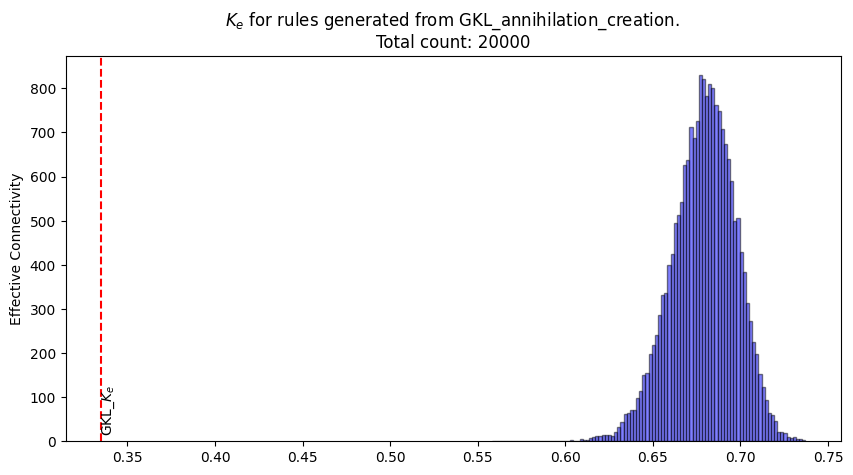

Item: GP   Bias: 0.5   Effective Connectivity: 0.34002976190476186
?????1?100000000?1?1?1?100000?0??????1?100000000?1?1?1?100000?0??1?1?1?1?????????1?1?1?1?????????1?1?1?1?????????1?1?1?1????????
4.43e+20 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
New closest effective connectivity: 0.5861062393707483
New closest effective connectivity: 0.5667884199134199
New closest effective connectivity: 0.5537494685374149
New closest effective connectivity: 0.5251262223639456
New closest effective connectivity: 0.5240194515306122
Count: 2000
Count: 4000
Count: 6000
New closest effective connectivity: 0.5082788584183674
Count: 8000
Count: 10000
Count: 12000
Count: 14000
Count: 16000
Count: 18000
Count: 20000


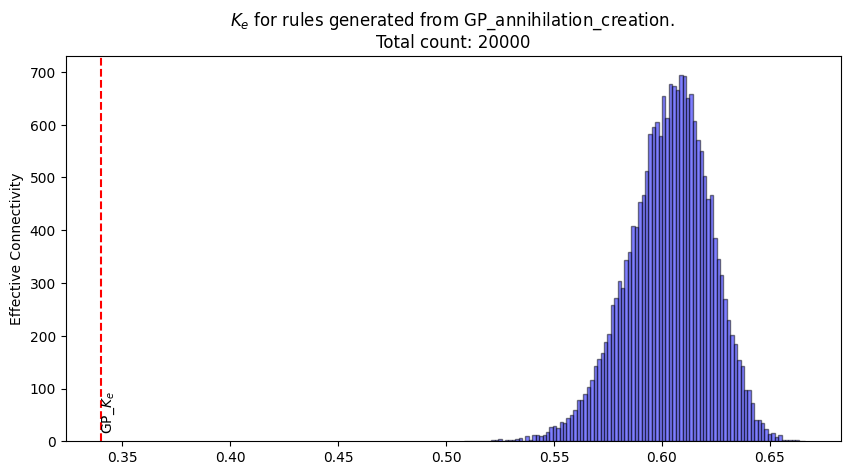

Item: GEP_1   Bias: 0.5   Effective Connectivity: 0.3902529761904763
???1???100000000?1?1?1?100000000???1???10000?????1?1?1?10000???????1???1?????????1?1?1?1???????????1???1?????????1?1?1?1????????
1.08e+23 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
New closest effective connectivity: 0.621080463435374
New closest effective connectivity: 0.6196614583333334
New closest effective connectivity: 0.6173553535997732
New closest effective connectivity: 0.5963169642857142
New closest effective connectivity: 0.5742931547619047
New closest effective connectivity: 0.5593865150226758
Count: 2000
New closest effective connectivity: 0.5485584077380953
Count: 4000
Count: 6000
Count: 8000
New closest effective connectivity: 0.5471234587585034
Count: 10000
Count: 12000
Count: 14000
New closest effective connectivity: 0.5361491992630386
Count: 16000
Count: 18000
Count: 20000


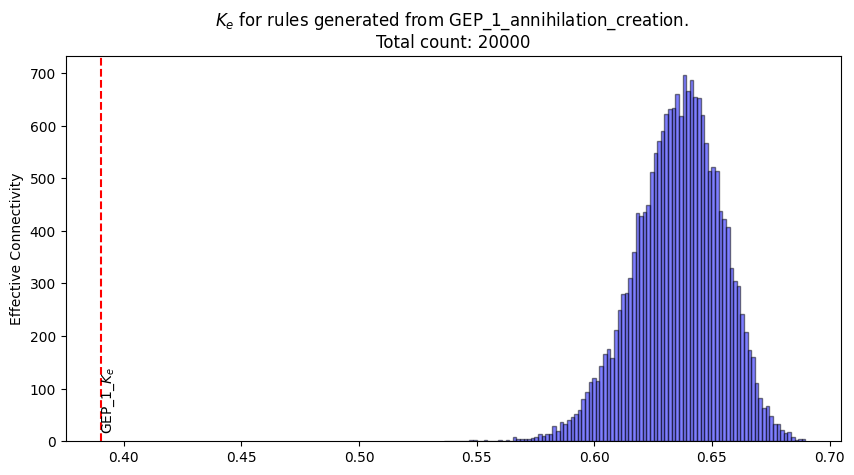

Item: GEP_2   Bias: 0.5   Effective Connectivity: 0.3902529761904763
????????0?0?0?0?????????0???0???????????0?0?0?0?????????0???0???????11110?0?0?0?????11110???0???111111110?0?0?0?111111110???0???
1.08e+23 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
New closest effective connectivity: 0.6181640625
New closest effective connectivity: 0.6013720592403627
New closest effective connectivity: 0.5882028592687075
New closest effective connectivity: 0.5539009353741496
Count: 2000
Count: 4000
Count: 6000
Count: 8000
New closest effective connectivity: 0.5499707695578232
New closest effective connectivity: 0.5317442602040816
Count: 10000
Count: 12000
Count: 14000
Count: 16000
Count: 18000
Count: 20000


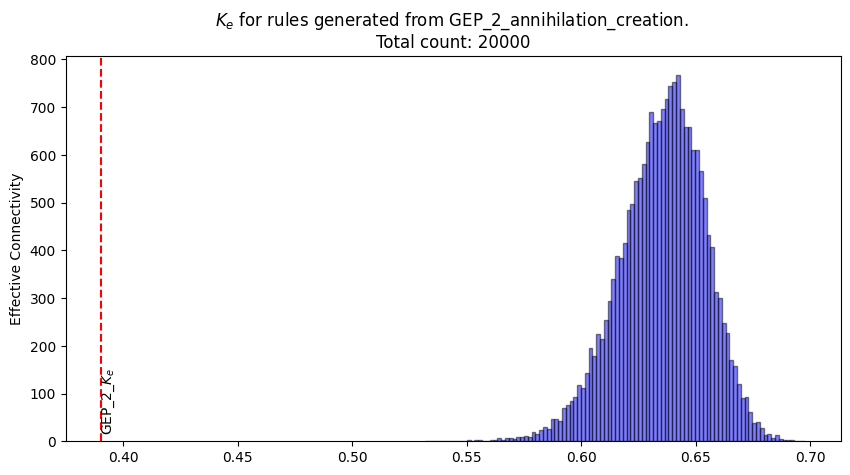

Item: Das   Bias: 0.5   Effective Connectivity: 0.40878507653061213
?????11100000000?????111????????????111100000000????1111????????????111100000000?????111????????????111100??000?????1111????????
1.12e+20 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
New closest effective connectivity: 0.6229339392006804
New closest effective connectivity: 0.5869791666666667
New closest effective connectivity: 0.5792357568027212
New closest effective connectivity: 0.5743675595238095
New closest effective connectivity: 0.5632520195578231
New closest effective connectivity: 0.5412574404761904
New closest effective connectivity: 0.5186011904761905
New closest effective connectivity: 0.5101340252009895
Count: 2000
Count: 4000
Count: 6000
New closest effective connectivity: 0.5092261904761904
Count: 8000
Count: 10000
Count: 12000
Count: 14000
Count: 16000
Count: 18000
New closest effective connectivity: 0.48152901785714286
Count: 20000


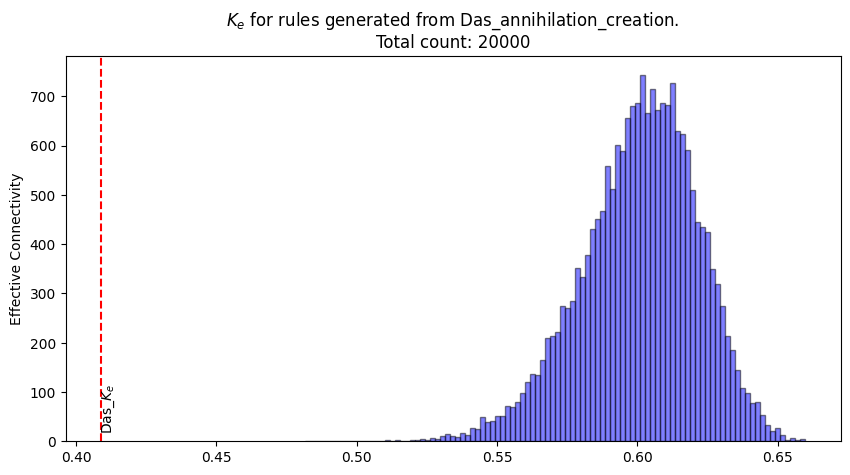

Item: Davis   Bias: 0.5   Effective Connectivity: 0.4795758928571429
????????00?0??????????110?0?????????????000?????11??1111000?????????????00?0????111111??0?0?????????????000?????11111111000?????
1.68e+24 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
New closest effective connectivity: 0.6404031143707483
New closest effective connectivity: 0.6251169217687076
New closest effective connectivity: 0.609874574829932
New closest effective connectivity: 0.6048203656462585
New closest effective connectivity: 0.5666555945294784
New closest effective connectivity: 0.5582629145408163
Count: 2000
Count: 4000
Count: 6000
Count: 8000
Count: 10000
Count: 12000
Count: 14000
Count: 16000
Count: 18000
Count: 20000


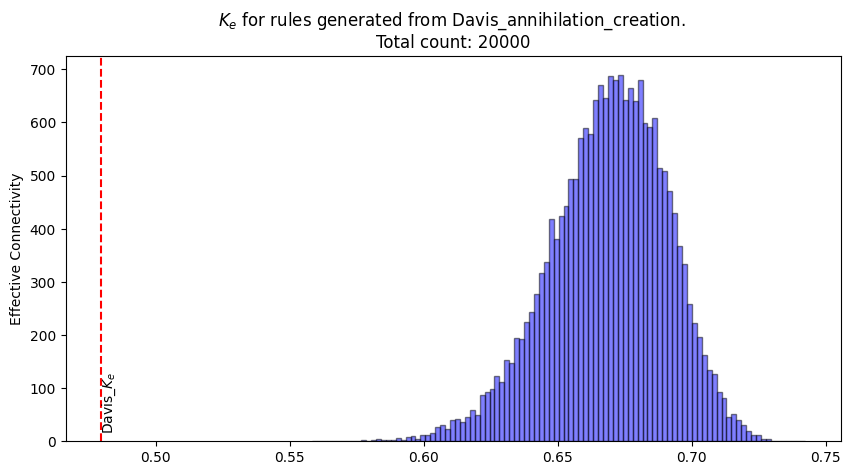

Item: ABK   Bias: 0.5   Effective Connectivity: 0.34002976190476186
?????1?100000000?1?1?1?100000?0??????1?100000000?1?1?1?100000?0??1?1?1?1?????????1?1?1?1?????????1?1?1?1?????????1?1?1?1????????
4.43e+20 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
New closest effective connectivity: 0.6121386054421769
New closest effective connectivity: 0.5859844458616781
New closest effective connectivity: 0.5757157029478458
New closest effective connectivity: 0.5389491213151928
New closest effective connectivity: 0.5357116284013606
New closest effective connectivity: 0.5284305909863946
New closest effective connectivity: 0.5264110331632653
Count: 2000
New closest effective connectivity: 0.5115433673469388
Count: 4000
New closest effective connectivity: 0.5101380916950113
Count: 6000
Count: 8000
Count: 10000
Count: 12000
Count: 14000
Count: 16000
Count: 18000
Count: 20000


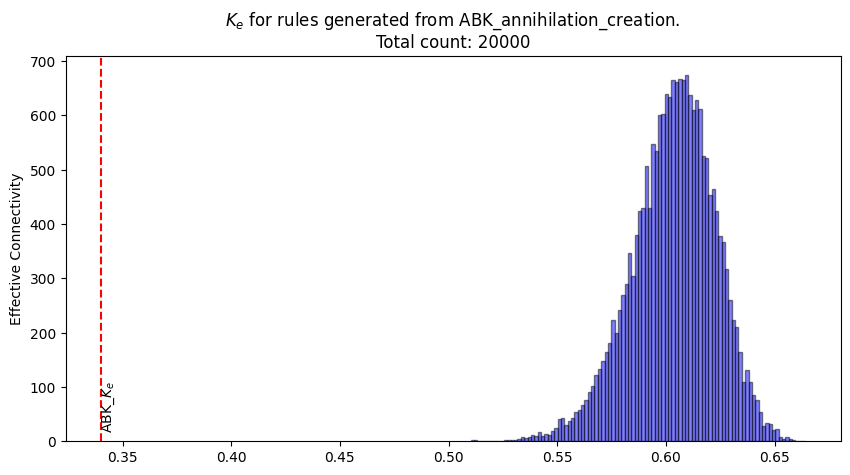

Item: DMC   Bias: 0.4921875   Effective Connectivity: 0.5980902375154608
?????1?100000?00?????1?1?0000????????1?100000000????11110???0?????????110???0????1?1?1?1?00000???1111?11????????1?11?1110???????
2.21e+20 possible permutation(s) with a bias of 0.4921875. This is the closest bias less than or equal to the required bias of 0.4921875.
New closest effective connectivity: 0.6608635381235828
New closest effective connectivity: 0.6205761376520306
New closest effective connectivity: 0.6022508245722531
New closest effective connectivity: 0.6017547123015873
New closest effective connectivity: 0.5987044794243455
New closest effective connectivity: 0.5984113697562358
Count: 2000
New closest effective connectivity: 0.5983768246882085
New closest effective connectivity: 0.5980986926020408
Count: 4000
Count: 6000
Count: 8000
Count: 10000
Count: 12000
Count: 14000
Count: 16000
Count: 18000
New closest effective connectivity: 0.598093820861678
Count: 20000


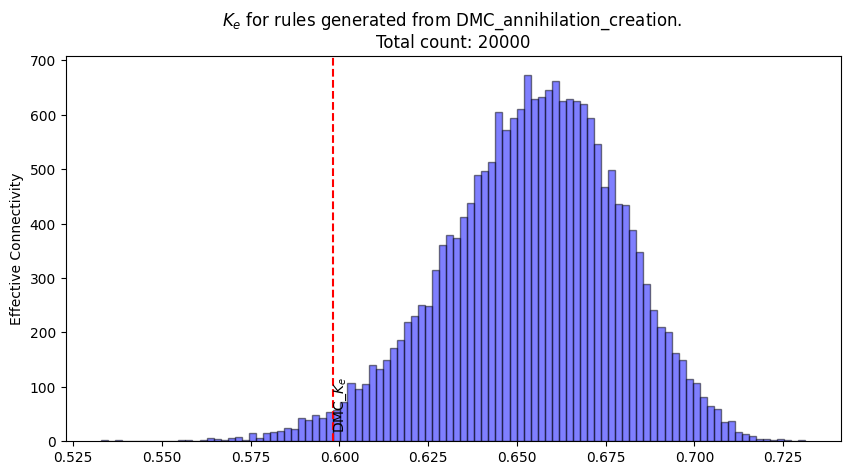

Item: COE_1   Bias: 0.515625   Effective Connectivity: 0.6442965206916098
???????1000?0?00??11??????0?0??????1???10000??????111??10?0?0????????1?1?0??0?0011111111000?0???1111???10?????0?11111??10?0?0???
1.09e+20 possible permutation(s) with a bias of 0.515625. This is the closest bias less than or equal to the required bias of 0.515625.
New closest effective connectivity: 0.6694178713151927
New closest effective connectivity: 0.6521205357142856
New closest effective connectivity: 0.6401073473897135
New closest effective connectivity: 0.6463594812925171
New closest effective connectivity: 0.6447039753401361
New closest effective connectivity: 0.6446198270975056
New closest effective connectivity: 0.6443505527210884
New closest effective connectivity: 0.6442681760204082
Count: 2000
Count: 4000
New closest effective connectivity: 0.64428560960369
Count: 6000
Count: 8000
Count: 10000
New closest effective connectivity: 0.6442956349206349
Count: 12000
Count: 14000
Count: 16000
Count: 18000


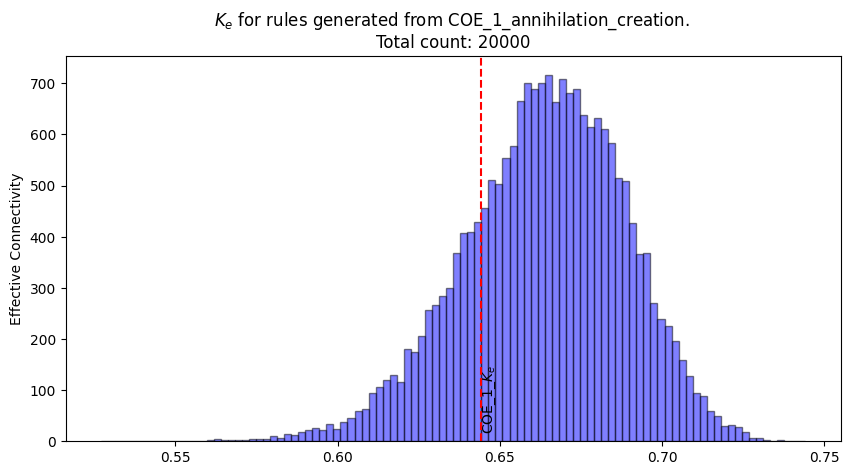

Item: COE_2   Bias: 0.5   Effective Connectivity: 0.5761554882369614
???1?1??0?0?000???11????0?0???00????????0?0?000011??111?0?0????????1?111000?000?111111110?0?????????11110?0?00??11??11110?0?????
7.22e+18 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
New closest effective connectivity: 0.6829486671562565
New closest effective connectivity: 0.6379278273809523
New closest effective connectivity: 0.605429373453927
New closest effective connectivity: 0.5997572987528343
New closest effective connectivity: 0.5745163287853021
New closest effective connectivity: 0.5777689882042562
New closest effective connectivity: 0.5764358471389721
New closest effective connectivity: 0.5762395559549578
Count: 2000
Count: 4000
New closest effective connectivity: 0.5761546024659864
Count: 6000
Count: 8000
Count: 10000
Count: 12000
Count: 14000
Count: 16000
Count: 18000
Count: 20000


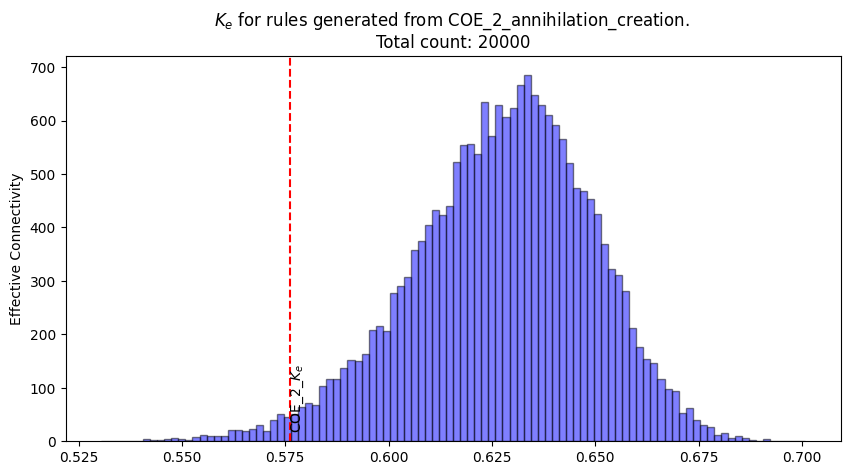

Item: MM401   Bias: 0.5   Effective Connectivity: 0.39369685374149654
11111111?0?0?0?011111111?0?0?00011111111?0?0?0?011111111?0?0?0001111?????0?0?0?0?????????0?0?000?????????0?0?0?0?????????0?0?000
7.65e+15 possible permutation(s) with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
New closest effective connectivity: 0.518970556972789
New closest effective connectivity: 0.4743463010204082
New closest effective connectivity: 0.4612457482993197
Count: 2000
Count: 4000
New closest effective connectivity: 0.45752285289115646
New closest effective connectivity: 0.4551392431972789
Count: 6000
Count: 8000
Count: 10000
Count: 12000
Count: 14000
New closest effective connectivity: 0.4506058673469388
Count: 16000
Count: 18000
Count: 20000


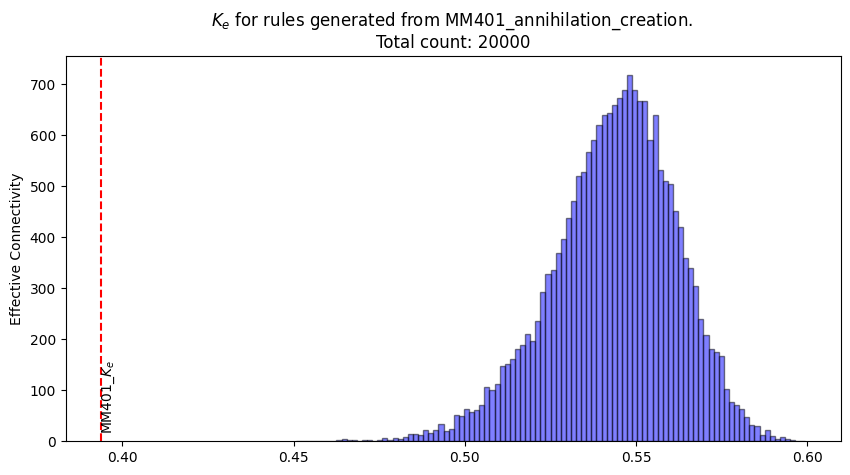

In [ ]:
limit_bias = 20000
limit_ec = 100
shuffle = False

rules = (
    "GKL",# shuffle = False
    "GP", # shuffle = False
    "GEP_1", # shuffle = False
    "GEP_2", # shuffle = False
    "Das", # shuffle = False
    "Davis",# shuffle = True
    "ABK",#
    "DMC",# shuffle = True
    "COE_1",#
    "COE_2",# shuffle = True
    "MM401", # shuffle = False
)
# for item in rules:
#     item_ke = BooleanNode.from_output_list(
#         automata_output_list[item]
#     ).effective_connectivity()
#     item_bias = BooleanNode.from_output_list(automata_output_list[item]).bias()
#     print(f"Item: {item}   Bias: {item_bias}   Effective Connectivity: {item_ke}")

#     node = BooleanNode.from_partial_lut(annihilation_generation[item])
#     print(concatenate(node.outputs))

#     closest_node = None
#     closest_ke = None
#     closest_bias = None
#     nodebias = []
#     nodeke = []
#     count = 0

#     # from a given bias criterion
#     nodes_from_bias = node.generate_with_required_bias(
#         bias=item_bias, verbose=True
#     )
#     # print(concatenate(next(nodes_from_bias).outputs))
#     limit = limit_bias
#     for node in nodes_from_bias:
#         count += 1
#         ke = node.effective_connectivity()
#         nodeke.append(ke)
#         if closest_node is None or abs(ke - item_ke) < abs(closest_ke - item_ke):
#             closest_node = node
#             closest_ke = ke
#             print(f"New closest effective connectivity: {closest_ke}")

#         # # print(node.effective_connectivity())
#         # if node.is_within_tolerance(effective_connectivity=item_ke, epsilon=0.05):
#         #     print(concatenate(node.outputs))
#         #     break

#         if count % (limit / 10) == 0:
#             print(f"Count: {count}")
#         if count == limit:
#             break

#     plt.figure(figsize=(10, 5))
#     plt.hist(nodeke, bins=100, alpha=0.5, color="b", edgecolor="black", linewidth=1.0)
#     plt.ylabel("Effective Connectivity")

#     # mark the item's effective connectivity
#     plt.axvline(x=item_ke, color="r", linestyle="--", label=f"{item}_$K_e$")
#     # label this line
#     plt.text(item_ke, 25, f"{item}_$K_e$", rotation=90)

#     plt.title(
#         f"$K_e$ for rules generated from {item}_annihilation_creation. \nTotal count: {count}"
#     )

#     plt.savefig(f"ke_{item}_annihilation_creation.png")
#     plt.show()
#     plt.close()

    # # from a given effective connectivity criterion
    # limit = limit_ke
    # closest_node = None

    # node = BooleanNode.from_partial_lut(annihilation_generation[item])
    # nodes_from_ke = node.generate_with_required_effective_connectivity(
    #     effective_connectivity=item_ke, epsilon=0.01, shuffle=shuffle, verbose=False
    # )
    # count = 0

    # for node in nodes_from_ke:
    #     count += 1
    #     bias = node.bias()
    #     nodebias.append(bias)

    #     if closest_node is None or abs(bias - item_bias) < abs(
    #         closest_bias - item_bias
    #     ):
    #         closest_node = node
    #         closest_bias = bias
    #         print(f"New closest bias: {closest_bias}")

    #     if node.is_within_tolerance(bias=item_bias):
    #         print(concatenate(node.outputs))
    #         break

    #     if count % (limit / 10) == 0:
    #         print(f"Count: {count}")
    #     if count == limit:
    #         break

    # plt.figure(figsize=(10, 5))
    # plt.hist(nodebias, bins=100, alpha=0.5, color="b", edgecolor="black", linewidth=1.0)
    # plt.ylabel("Bias")

    # # mark the item's bias
    # plt.axvline(x=item_bias, color="r", linestyle="--", label=f"{item}_bias")
    # # label this line
    # plt.text(item_bias, 30, f"{item}_bias", rotation=90)

    # plt.title(
    #     f"Bias for rules generated from {item}_annihilation_creation. \nTotal count: {count}"
    # )
    # plt.savefig(f"bias_{item}_annihilation_creation.png")

    # plt.show()
    # plt.close()